In [ ]:
#yolo

In [1]:
### Install dataset directly from kaggle

!pip install numpy pandas scikit-learn opencv-python matplotlib


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 4.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.9 MB/s eta 0:00:004.9 MB/s eta 0:00:01


In [1]:
### {"username":"harshithsg","key":"681d1d152f3c480cf9d356c33abcce84"}

import opendatasets as od
import pandas as pd

od.download("https://www.kaggle.com/datasets/mariaherrerot/messidor2preprocess/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/mariaherrerot/messidor2preprocess


100%|██████████| 381M/381M [01:03<00:00, 6.25MB/s] 


In [1]:
image_directory='messidor2preprocess/messidor-2/messidor-2/preprocess'
image_directory

'messidor2preprocess/messidor-2/messidor-2/preprocess'

## Mapping photo with grading

In [2]:
import pandas as pd
# load csv
image_directory='messidor2preprocess/messidor-2/messidor-2/preprocess'
grade_csv_path='messidor2preprocess/messidor_data.csv'
# csv to df                                 
data=pd.read_csv(grade_csv_path)
data['id_code']=data['id_code'].apply(lambda x: image_directory+'/'+x)
data=data.rename(columns={'id_code':'image_path'}) 
data.head()

,image_path,diagnosis,adjudicated_dme,adjudicated_gradable
0,messidor2preprocess/messidor-2/messidor-2/prep...,0,0,1
1,messidor2preprocess/messidor-2/messidor-2/prep...,1,0,1
2,messidor2preprocess/messidor-2/messidor-2/prep...,1,0,1
3,messidor2preprocess/messidor-2/messidor-2/prep...,2,1,1
4,messidor2preprocess/messidor-2/messidor-2/prep...,0,0,1


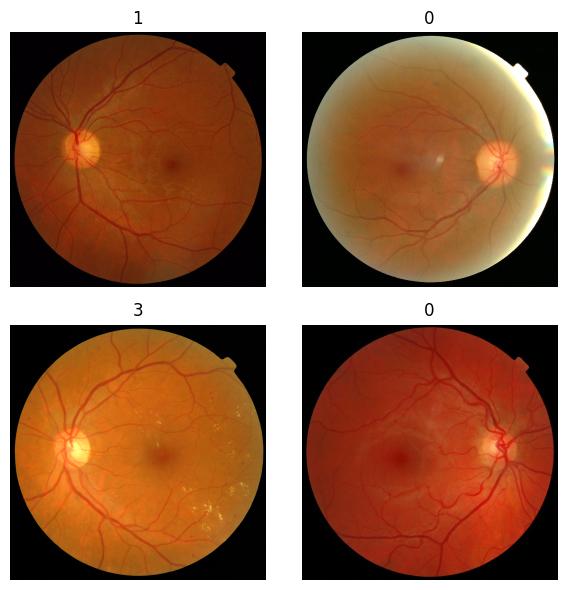

In [32]:
import random
import matplotlib.pyplot as plt
import cv2
import pandas as pd

def display_samples(df, columns=2, rows=2, im_size=256):
    fig = plt.figure(figsize=(3 * columns, 3 * rows))
    size = len(df)
    
    for i in range(columns * rows):
        j = random.randint(0, size - 1)
        image_path = df.loc[j, 'image_path']
        image_id = df.loc[j, 'diagnosis']
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (im_size, im_size))
        # img = cv2.addWeighted(img,4,cv2.GaussianBlur(img, (0,0), im_size/40) ,-4 ,128)
        
        fig.add_subplot(rows, columns, i + 1)
        plt.title(image_id)
        plt.imshow(img)
        plt.axis('off')  # Hide the axes for better visualization
    
    plt.tight_layout()
    plt.show()

display_samples(data)

train-test split

In [5]:
data=data.drop(columns={                    })
data.head()

,image_path,diagnosis
0,messidor2preprocess/messidor-2/messidor-2/prep...,0
1,messidor2preprocess/messidor-2/messidor-2/prep...,1
2,messidor2preprocess/messidor-2/messidor-2/prep...,1
3,messidor2preprocess/messidor-2/messidor-2/prep...,2
4,messidor2preprocess/messidor-2/messidor-2/prep...,0


In [19]:
data.shape

(1744, 2)

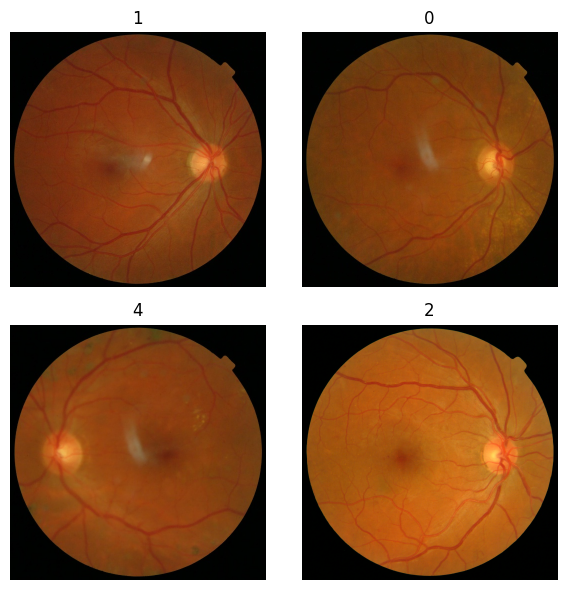

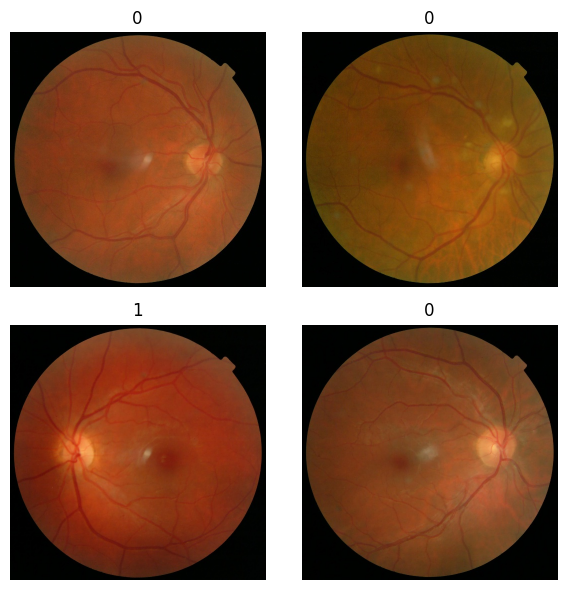

In [33]:
RANDOM_SEED=2024
import random
from sklearn.model_selection import train_test_split
data=data.reset_index(drop=True)
train_data, test_data =train_test_split(data, test_size=0.3, random_state=RANDOM_SEED)
train_data=train_data.reset_index(drop=True)
test_data=test_data.reset_index(drop=True)
display_samples(train_data, columns=2, rows=2)
display_samples(test_data, columns=2, rows=2)

In [24]:
print(train_data.shape)
train_data.head()

(1220, 2)


,image_path,diagnosis
1131,messidor2preprocess/messidor-2/messidor-2/prep...,0
140,messidor2preprocess/messidor-2/messidor-2/prep...,0
213,messidor2preprocess/messidor-2/messidor-2/prep...,0
738,messidor2preprocess/messidor-2/messidor-2/prep...,2
145,messidor2preprocess/messidor-2/messidor-2/prep...,1


## Model creation (first draft)

# Old Code

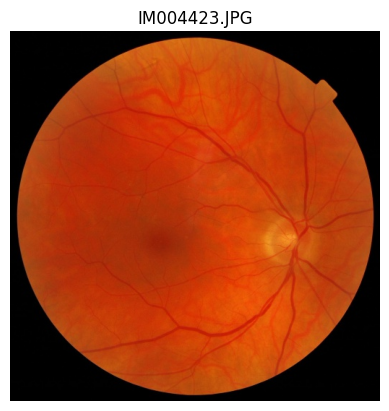

In [5]:
  ## test if image is loaded
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

files=os.listdir(train_data_path)
image_files = [f for f in files if f.lower().endswith(('png', 'jpg', 'jpeg', 'gif', 'bmp'))]

# Choose a random image file
random_image = random.choice(image_files)

# Construct the full path to the image file
image_path = os.path.join(train_data_path, random_image)

# Load and display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.title(random_image)
plt.axis('off')  # Turn off axes
plt.show()    


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from tqdm import tqdm,tqdm_notebook
from prettytable import PrettyTable
import pickle
import os
print('CWD is ',os.getcwd())

# Vis Libs..
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["axes.grid"] = False

# Image Libs.
from PIL import Image
import cv2

# DL Libs..
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

CWD is  /content


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the data
df = pd.read_csv('/content/messidor2preprocess/messidor_data.csv')  # Replace with your actual file name

# Step 2: Shuffle the data
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 3: Split the data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Step 4: Save the split data
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [ ]:
def load_data():
    # Update the paths to include the directory where your CSV files are located
    train = pd.read_csv('/content/train.csv')
    test = pd.read_csv('/content/test.csv')

    train_dir = os.path.join('./','train_images/')
    test_dir = os.path.join('./','test_images/')

    train['file_path'] = train['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
    test['file_path'] = test['id_code'].map(lambda x: os.path.join(test_dir,'{}.png'.format(x)))

    train['file_name'] = train["id_code"].apply(lambda x: x + ".png")
    test['file_name'] = test["id_code"].apply(lambda x: x + ".png")

    train['diagnosis'] = train['diagnosis'].astype(str)

    return train

In [ ]:
df_train,df_test = load_data()
print(df_train.shape,df_test.shape,'\n')
df_train.head(6)

ValueError: too many values to unpack (expected 2)

In [ ]:
!ls /content/messidor2preprocess/messidor-2/messidor-2/preprocess

20051020_43808_0100_PP.png  20051214_50895_0100_PP.png	20060412_63032_0200_PP.png  IM001540.JPG
20051020_43832_0100_PP.png  20051214_50933_0100_PP.png	20060412_63088_0200_PP.png  IM001559.JPG
20051020_43882_0100_PP.png  20051214_51039_0100_PP.png	20060412_63104_0200_PP.png  IM001560.JPG
20051020_43906_0100_PP.png  20051214_51071_0100_PP.png	20060522_43758_0100_PP.png  IM001581.JPG
20051020_44261_0100_PP.png  20051214_51178_0100_PP.png	20060522_45069_0100_PP.png  IM001582.JPG
20051020_44284_0100_PP.png  20051214_51211_0100_PP.png	20060522_45212_0100_PP.png  IM001596.JPG
20051020_44338_0100_PP.png  20051214_51308_0100_PP.png	20060522_45248_0100_PP.png  IM001597.JPG
20051020_44349_0100_PP.png  20051214_51342_0100_PP.png	20060522_45402_0100_PP.png  IM001617.JPG
20051020_44400_0100_PP.png  20051214_51442_0100_PP.png	20060522_45455_0100_PP.png  IM001618.JPG
20051020_44431_0100_PP.png  20051214_51469_0100_PP.png	20060522_45541_0100_PP.png  IM001629.JPG
20051020_44598_0100_PP.png  20051214_515